In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading in data

In [2]:
df = pd.read_excel('data/tech_layoffs.xlsx')
df.head()

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942


## Correcting data types

In order to prepare the data for exploratory analysis, we are going to correct the datatypes such that they are easily usable by plotting functions.

In [3]:
df.dtypes

#                                       int64
Company                                object
Location_HQ                            object
Country                                object
Continent                              object
Laid_Off                                int64
Date_layoffs                   datetime64[ns]
Percentage                            float64
Company_Size_before_Layoffs             int64
Company_Size_after_layoffs              int64
Industry                               object
Stage                                  object
Money_Raised_in_$_mil                  object
Year                                    int64
lat                                   float64
lng                                   float64
dtype: object

In [4]:
df['Funding'] = df['Money_Raised_in_$_mil'].apply(lambda s: np.float64(s[1:])) 
df['Funding'].head()

0     1700.0
1      733.0
2      116.0
3      500.0
4    15000.0
Name: Funding, dtype: float64

## Correlation between funding and Percent Layoffs

In [5]:
df

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng,Funding
0,3,ShareChat,Bengaluru,India,Asia,200,2023-12-20,15.0,1333,1133,Consumer,Series H,$1700,2023,12.97194,77.59369,1700.0
1,4,InSightec,Haifa,Israel,Asia,100,2023-12-19,20.0,500,400,Healthcare,Unknown,$733,2023,32.81841,34.98850,733.0
2,6,Enphase Energy,San Francisco Bay Area,USA,North America,350,2023-12-18,10.0,3500,3150,Energy,Post-IPO,$116,2023,37.54827,-121.98857,116.0
3,7,Udaan,Bengaluru,India,Asia,100,2023-12-18,10.0,1000,900,Retail,Unknown,1500,2023,12.97194,77.59369,500.0
4,14,Cruise,San Francisco Bay Area,USA,North America,900,2023-12-14,24.0,3750,2850,Transportation,Acquired,$15000,2023,37.77493,-122.41942,15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,3286,Pitch,Berlin,Germany,Europe,80,2024-08-01,67.0,119,39,Other,Series B,$138,2024,52.52437,13.41053,138.0
1414,3287,BenchSci,Toronto,Canada,North America,70,2024-08-01,17.0,412,342,Healthcare,Series D,$164,2024,43.70643,-79.39864,164.0
1415,3288,NanoString Technology,Seattle,USA,North America,50,2024-08-01,9.0,556,506,Healthcare,Post-IPO,$826,2024,47.60621,-122.33207,826.0
1416,3289,Trigo,Tel Aviv,Israel,Asia,30,2024-04-01,15.0,200,170,Retail,Series C,$199,2024,32.08088,34.78057,199.0


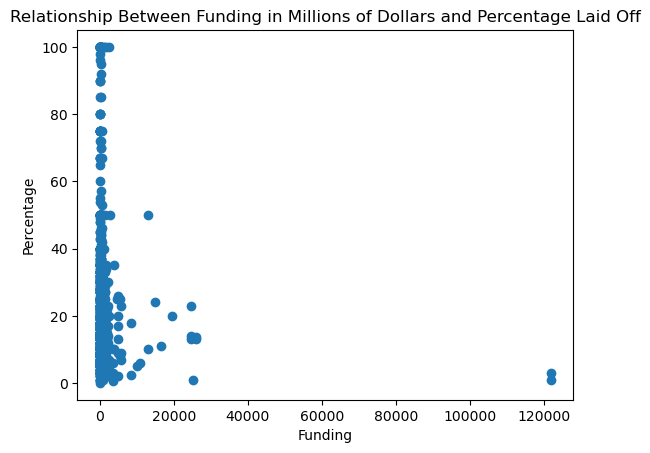

In [6]:
plt.scatter(df['Funding'], df['Percentage'])
plt.xlabel('Funding')
plt.ylabel('Percentage')
plt.title('Relationship Between Funding in Millions of Dollars and Percentage Laid Off')
plt.show()

From this scatter plot, we can see that there is a strong relationship between the funding a company recieves and the percentage of their staff they layoff. With a majoirty of that data on the left side of the graph, the line of best fit looks almot vertical. It also shows that a majoirty of our data is from companies that receive below 40,000,000,000 in funding. We have two outliers on the far right.

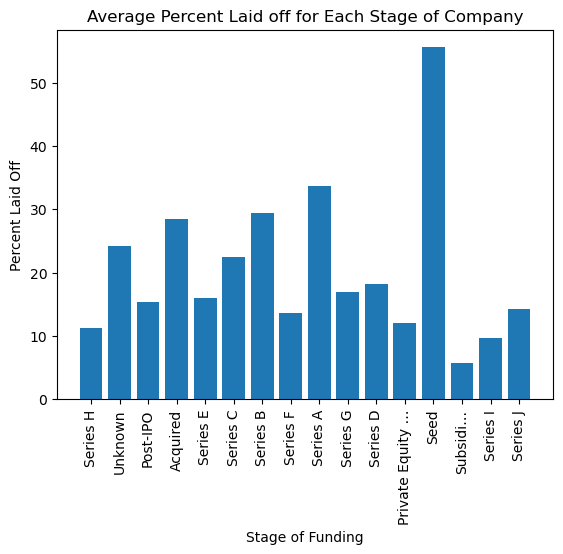

In [7]:
stages=df['Stage'].unique()
list_stages_df = []
for i in stages:
    x = df[df.get('Stage') == i]
    list_stages_df.append(x)
mean_stages_df = []
for i in list_stages_df:
    y = i.get('Percentage').mean()
    mean_stages_df.append(y)
plt.bar(stages, mean_stages_df)
plt.xticks(rotation=90)
plt.title('Average Percent Laid off for Each Stage of Company')
plt.xlabel('Stage of Funding')
plt.ylabel('Percent Laid Off')
plt.show()

The graph pictured above shoes the average percent laid off for each stage of funding. We can see that at the seed stage, which is typically the early stages of a company, that they have the highest avergage percent laid off. 

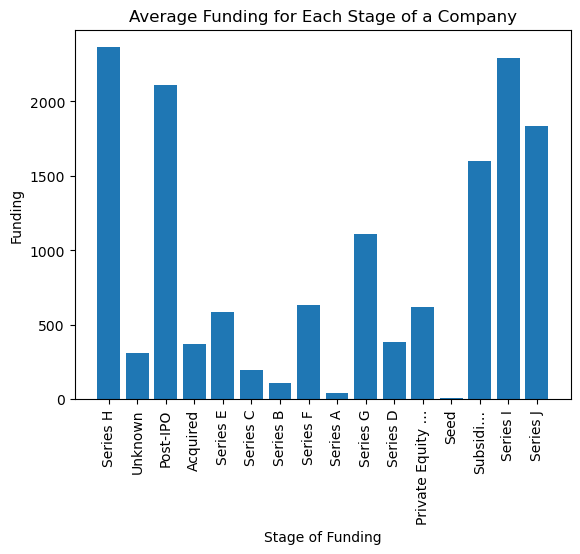

In [8]:
mean_funding_df = []
for i in list_stages_df:
    y = i.get('Funding').mean()
    mean_funding_df.append(y)
plt.bar(stages, mean_funding_df)
plt.xticks(rotation=90)
plt.title('Average Funding for Each Stage of a Company')
plt.xlabel('Stage of Funding')
plt.ylabel('Funding')
plt.show()

The graph above represent the avergage funding a company recieves at each stage of company. As expected, companies that are just starting out, do not get that much compared to the bigger companies. 

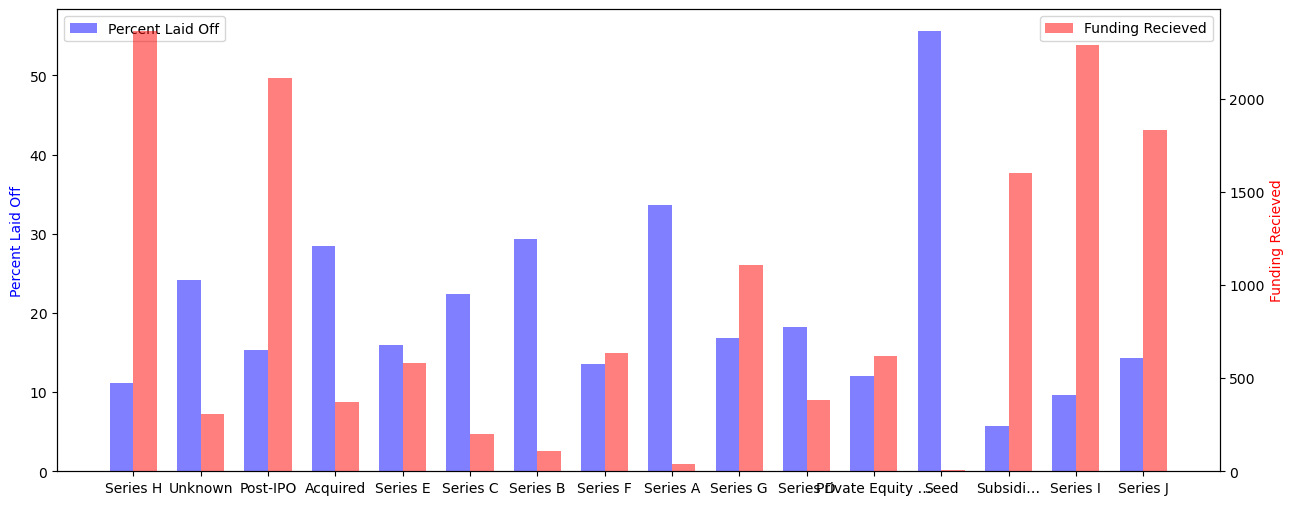

In [12]:
bar_width = 0.35
x = np.arange(len(stages))
fig, ax1 = plt.subplots(figsize = (15,6))
bars1 = ax1.bar(x - bar_width/2, mean_stages_df, bar_width, color='blue', alpha=0.5, label='Percent Laid Off')
ax2 = ax1.twinx()
bars2 = ax2.bar(x + bar_width/2, mean_funding_df, bar_width, color='red', alpha=0.5, label='Funding Recieved')
ax1.set_ylabel('Percent Laid Off', color='blue')
ax2.set_ylabel('Funding Recieved', color='red')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.xticks(x, stages, rotation=90)
plt.show()

From this double bar graph, we can see that there is an inverse relation between funding and percent laid off. The lower the amount of funds a company recieves, the more the chances of layoff. This is also supported by the scatter plot proving that there is a negative correlation between the two.